In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [77]:
# Load Titanic dataset
data = pd.read_csv('/content/titanic.csv')

In [78]:
# Separate features and target variable
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

In [79]:
# Impute missing values using SimpleImputer with appropriate strategies
imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

X_imputed_numeric = pd.DataFrame(imputer_numeric.fit_transform(X.select_dtypes(include='number')), columns=X.select_dtypes(include='number').columns)
X_imputed_categorical = pd.DataFrame(imputer_categorical.fit_transform(X.select_dtypes(exclude='number')), columns=X.select_dtypes(exclude='number').columns)

In [80]:
# Concatenate the imputed dataframes
X_imputed = pd.concat([X_imputed_numeric, X_imputed_categorical], axis=1)

# One-hot encode categorical variables
X_imputed = pd.get_dummies(X_imputed, columns=['Sex', 'Embarked'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

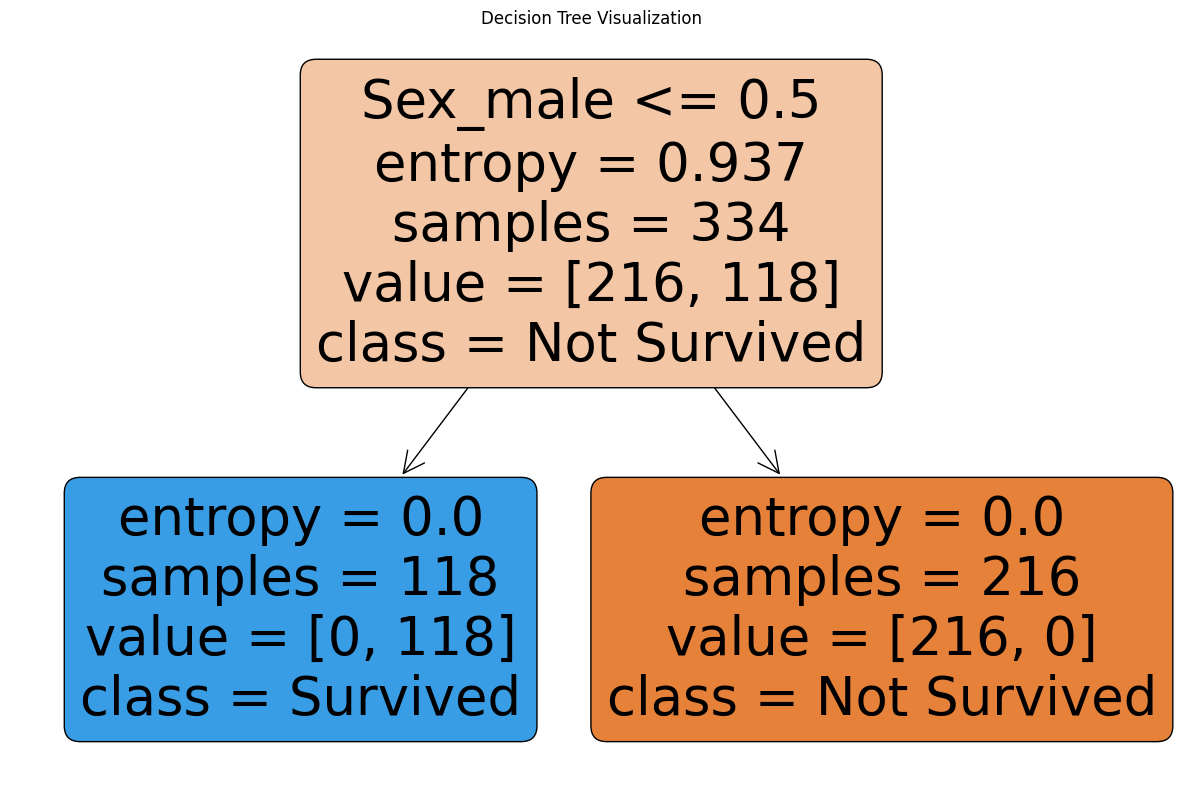

In [81]:
# Create and fit Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtc.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dtc, filled=True, feature_names=X_imputed.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()